Hand Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits.The images attribute of the datasets stores 8x8 arrays of gray scale values for each image . We will use these arrays to visualization the first 4 images.


# Import libraries

In [17]:
import pandas as pd

In [18]:
import numpy as nm

In [19]:
import matplotlib.pyplot as plt

## Import data

In [20]:
from sklearn.datasets import load_digits

In [21]:
df = load_digits()

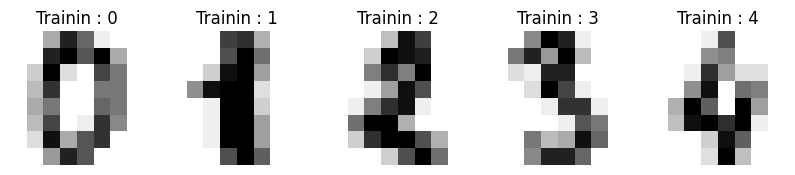

In [22]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,4))
for ax ,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap = plt.cm.gray_r,interpolation = "nearest")
  ax.set_title("Trainin : %i"%label)

## Data Preprocessing

flatten images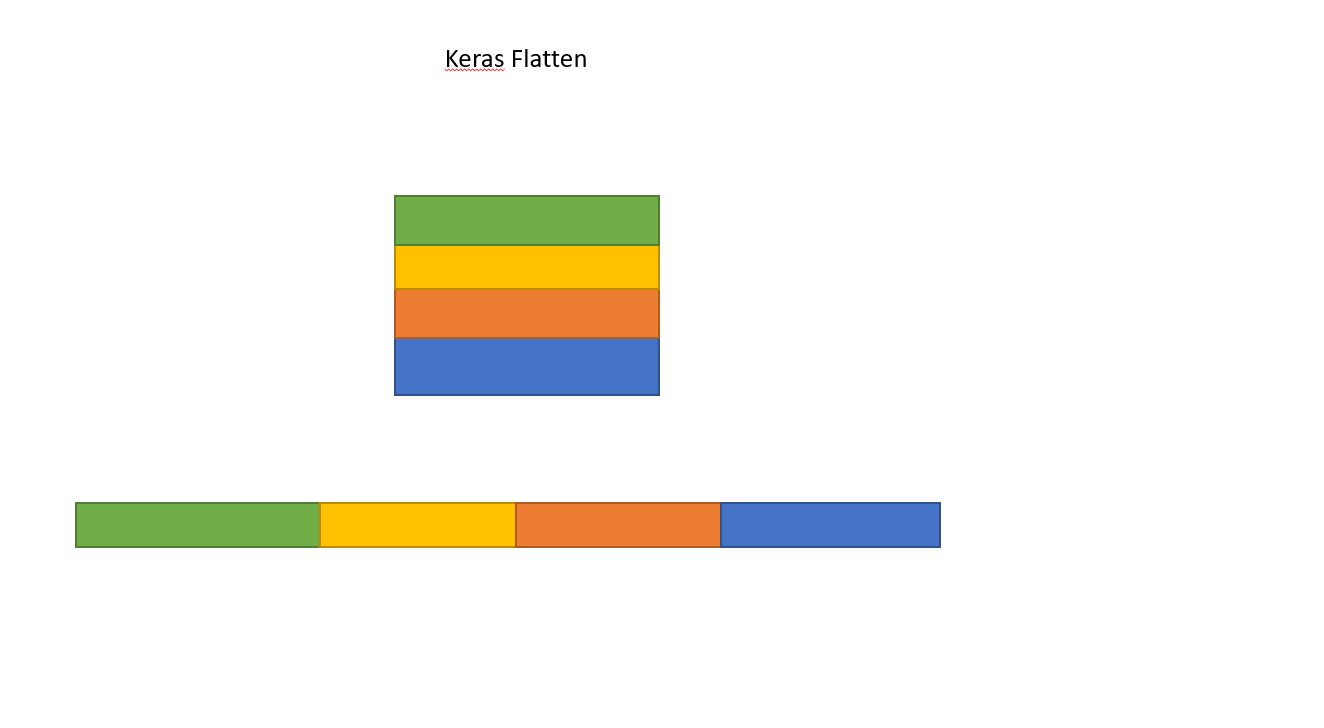

In [23]:
df.images.shape

(1797, 8, 8)

In [24]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [25]:
df.images[0].shape

(8, 8)

In [26]:
len(df.images)

1797

In [27]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [28]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
data[0].shape

(64,)

In [30]:
data.shape

(1797, 64)

## Scalling Image data

In [31]:
data.min()


0.0

In [32]:
data.max()

16.0

In [33]:
data = data/16

In [34]:
data.min()

0.0

In [35]:
data.max()

1.0

In [36]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data, df.target,test_size=0.3)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf =  RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier()

## Predict Test data

In [42]:
y_predict = rf.predict(x_test)

In [43]:
y_predict

array([1, 8, 5, 6, 1, 9, 0, 1, 2, 5, 2, 5, 6, 4, 1, 6, 7, 1, 2, 7, 0, 9,
       4, 6, 0, 5, 3, 1, 3, 1, 4, 8, 6, 3, 6, 0, 3, 7, 4, 9, 8, 0, 4, 6,
       6, 4, 6, 5, 8, 0, 6, 6, 0, 9, 2, 1, 1, 0, 0, 7, 7, 0, 0, 9, 8, 7,
       1, 0, 1, 6, 4, 2, 4, 8, 9, 4, 6, 1, 3, 8, 0, 8, 4, 0, 3, 2, 9, 2,
       2, 0, 8, 9, 0, 7, 8, 7, 6, 9, 0, 3, 3, 7, 3, 4, 1, 8, 9, 8, 7, 8,
       7, 1, 5, 8, 6, 9, 3, 1, 1, 2, 5, 3, 5, 6, 9, 9, 5, 3, 6, 0, 5, 7,
       7, 9, 4, 9, 8, 2, 9, 3, 3, 0, 4, 9, 9, 6, 7, 9, 5, 4, 0, 1, 8, 1,
       8, 9, 8, 6, 1, 0, 4, 1, 6, 6, 7, 1, 5, 6, 9, 1, 6, 0, 7, 3, 9, 2,
       8, 2, 3, 2, 0, 7, 5, 0, 4, 6, 4, 9, 8, 9, 4, 6, 5, 4, 0, 0, 6, 3,
       3, 9, 9, 8, 4, 7, 1, 9, 9, 8, 3, 2, 6, 0, 7, 1, 2, 4, 1, 6, 0, 4,
       9, 4, 6, 1, 7, 8, 4, 1, 3, 2, 7, 1, 2, 2, 4, 3, 2, 1, 3, 8, 9, 5,
       7, 2, 0, 5, 6, 0, 7, 0, 8, 3, 6, 1, 7, 4, 5, 0, 2, 6, 7, 7, 8, 0,
       4, 0, 8, 2, 5, 7, 5, 1, 1, 2, 2, 5, 0, 4, 7, 9, 9, 4, 7, 5, 1, 5,
       3, 5, 4, 1, 2, 2, 8, 8, 5, 5, 8, 9, 6, 3, 1,

# Model Accuracy

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
confusion_matrix(y_test, y_predict)

array([[61,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  2,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  1, 56,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 51,  0,  1],
       [ 0,  3,  0,  1,  0,  1,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]])

In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.93      1.00      0.96        53
           2       1.00      1.00      1.00        54
           3       0.98      0.90      0.94        51
           4       0.97      1.00      0.98        58
           5       0.91      0.93      0.92        46
           6       0.98      0.95      0.97        59
           7       0.98      0.96      0.97        53
           8       0.96      0.91      0.93        54
           9       0.93      1.00      0.96        50

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540

